[False  True False  True  True False  True  True  True False  True  True
  True  True False False  True  True False False  True  True False False
  True False False False False False False  True False  True  True False
 False False False False  True  True  True  True  True  True False False
  True  True False False  True False False False False False False  True
 False  True  True False  True  True  True  True  True False  True  True
 False False False  True  True  True  True False  True False  True  True
 False  True  True False False  True False  True False  True False False
 False False  True  True False False  True False  True  True False  True
 False  True  True  True  True False False False False False  True  True
 False False  True False False  True  True False  True False  True False
  True  True  True  True False  True  True  True  True False False False
 False False False False  True False]


Text(0, 0.5, 'Height')

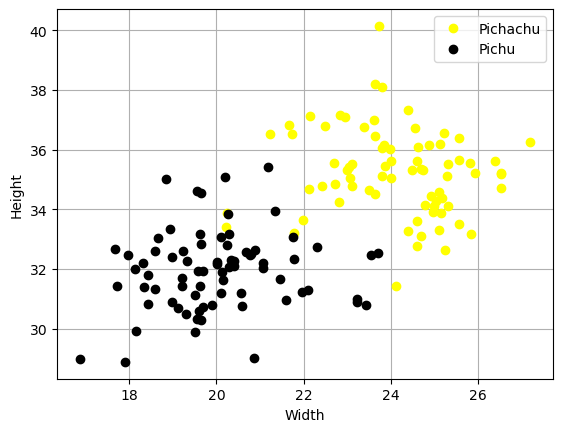

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

training_data = r"C:\Users\jubel\python-programming-JULIA-SALDE\Labs\datapoints.txt" #training data 
test_data = r"testpoints.txt"

x = [] #list for width and height
y = [] #list for the labels, 

with open(training_data, "r") as f: 
    next(f)

    for line in f:
        width, height, label = line.strip().split(",") #taking away spaces and diving into the 3 parts
        x.append([float(width), float(height)]) #adding to list x
        y.append(int(label)) #adding to list y

x = np.array(x)   #transformin into arrays
y = np.array(y)
y = (y == 1) # convert to bool, instead of 1 and 0 we get True and False


print(y)

widths =  x[ : , 0] #from x defining where the widths are, first element
heights = x[ : , 1] # heights are in x on second spot in each line 

#(y) is flagging True which is Pichachu (former 1)
#(~y) flips so True is Pichu (former 0)
plt.plot(widths[y], heights[y], 'o',color= 'yellow', label= "Pichachu") 
plt.plot(widths[~y], heights[~y], 'o', color= "black", label= "Pichu")
plt.legend() #label 
plt.grid()
plt.xlabel("Width")
plt.ylabel("Height")



In [ ]:
#here we manually added the test points into an array
x_test = np.array([[25,32], 
                   [24.2, 31.5],
                   [22, 34],
                   [20.5, 34]])


def Euclidean(point_1, point_2): # function to calculate distance

    distance = np.sqrt(np.square(point_1[0] - point_2[0]) + np.square(point_1[1] - point_2[1])) 
    return distance


def Calculate_ALL_distances(test_point, training_points):

    distances = [] 
    for training_point in training_points: #looping through the array of training points...
        d = Euclidean(test_point, training_point) #... we get the distance to the test point
        distances.append(d) #saving the distance between the test point and each training point
    return distances 

distances = Calculate_ALL_distances(x_test[1], x) #saving the list outside of function 


#we now want the index of the shortest distance so then check with y who it belongs to 

def Pitchu_or_Pikachu(test_point, training_points):
    distances = Calculate_ALL_distances(test_point, training_points)
    index_smallest_distances = np.argmin(distances) #finding the smallest distance

    if y[index_smallest_distances] == True: #the matching index in y 
        return "Pikachu"
    else:
        return "Pichu" 

Pitchu_or_Pikachu(x_test[3], x)

# TODO: we are converting user input to int, does that cause any problems?
while True:
    try: 
        input_weight = float(input("Write a weight: )"))
        if not input_weight > 0:
            raise ValueError("It must be a positive number")
        break
    except ValueError:
        print("Please use numbers")

while True:
    try: 
        input_height = float(input("Write a height: )"))
        if not input_height > 0:
            raise ValueError("It must be a positive number")
        break
    except ValueError:
        print("Please use numbers")

input_testpoint = [input_weight, input_height]


# TODO: same effect but shorter code
#  input_testpoint = [input_weight, input_height]

Pitchu_or_Pikachu(input_testpoint, x)


Please use numbers
Please use numbers
Please use numbers
Please use numbers


'Pikachu'

It's a tie


Text(0, 0.5, 'Height')

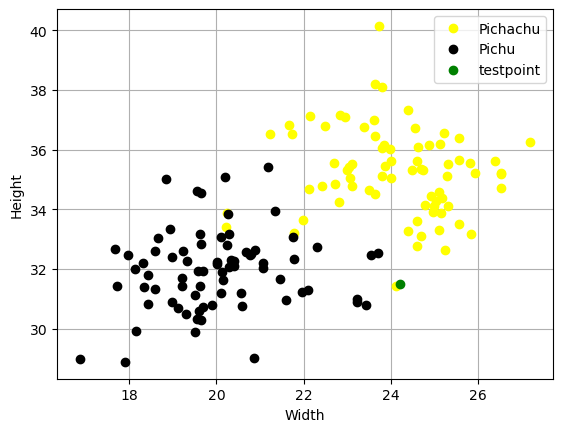

In [21]:
# task 2
test_point = x_test[1]
distances = Calculate_ALL_distances(test_point, x)
sorted_distances = np.argsort(distances) #sorts the distances in the list 
ten_closest = sorted_distances[0:10] 

amount_of_Pikachu = np.sum(y[ten_closest]) #will count when it is true 

if amount_of_Pikachu > 5:
    print("The majority says Pikachu")
elif amount_of_Pikachu < 5:
    print("Majority says Pitchu")  
else:
    print("It's a tie")

plt.plot(widths[y], heights[y], 'o',color= 'yellow', label= "Pichachu") 
plt.plot(widths[~y], heights[~y], 'o', color= "black", label= "Pichu")
plt.plot(test_point[0], test_point[1], 'o', color='green', label= "testpoint")
plt.legend() #label 
plt.grid()
plt.xlabel("Width")
plt.ylabel("Height")


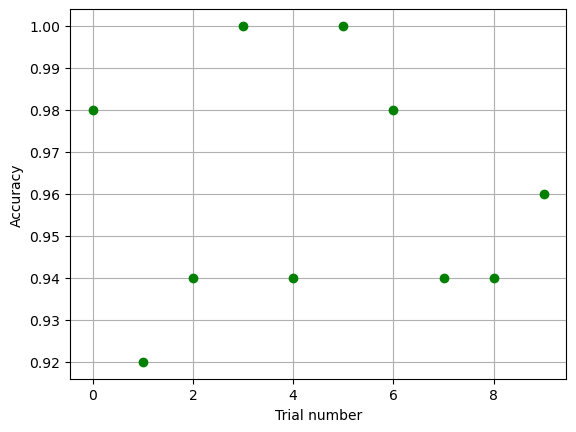

The mean accuracy is 0.96


In [125]:
all_accuracies = []

for i in range(10): 
    #task 3

    pika_points = x[y]
    pichu_points = x[~y]

    np.random.shuffle(pika_points)
    np.random.shuffle(pichu_points)

    randomized_training_points = np.concat([pika_points[:50], pichu_points[:50]])
    labels_training = np.array([True for _ in range(50)] + [False for _ in range(50)])

    randomized_testing_points = np.concat([pika_points[50:], pichu_points[50:]])
    labels_testing = [True for _ in range(25)] + [False for _ in range(25)]


    predicted_labels = []

    for i in randomized_testing_points:

        distances = Calculate_ALL_distances(i, randomized_training_points)
        sorted_distances = np.argsort(distances) #sorts the distances in the list 
        ten_closest = sorted_distances[0:10] 
        amount_of_Pikachu_per_loop = np.sum(labels_training[ten_closest]) #will count when it is true 

        predicted_labels.append(amount_of_Pikachu_per_loop > 5) 

    #task 4

    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(labels_testing)):
        a = predicted_labels[i]
        b = labels_testing[i]
        if (a == True) and (True == b):
            TP += 1
        elif (a== True) and (False == b):
            FP += 1
        elif (a== False) and (False == b):
            TN += 1
        elif (a== False) and (True == b): 
            FN +=1 
        else: print(a,b)
        
    accuracy = (TP + TN) / (TP+FP+TN+FN)
    
    all_accuracies.append(accuracy)

plt.plot(all_accuracies, 'o', color='green')    
plt.xlabel("Trial number")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print(f"The mean accuracy is {np.round(np.mean(all_accuracies), 3)}")




    